### FAKE NEWS DETECTION USING MACHINE LEARNING

## DATASET TAKEN FROM KAGGLE 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction,linear_model, model_selection,preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#### READ DATASET

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

C:\Users\pradh\AppData\Local\Temp\ipykernel_8188\4167979911.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('Fake.csv')


In [3]:
fake.shape

(23502, 172)

In [4]:
true.shape

(21417, 4)

#### DATA CLEANING AND PREPARATION

In [8]:
fake['target'] = 'fake'
true['target'] = 'true'
data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True)

In [10]:
data.head()

,title,text,subject,date,target
0,U.N. condemns civilian deaths from air attack ...,TRIPOLI (Reuters) - Air strikes killed at leas...,worldnews,"October 30, 2017",true
1,China calls on all sides to avoid provocations...,BEIJING (Reuters) - China s Foreign Ministry o...,worldnews,"October 11, 2017",true
2,Malawi vigilante arrests rise to 200 in vampir...,LILONGWE (Reuters) - Police in Malawi have arr...,worldnews,"October 24, 2017",true
3,Defiant U.S. prosecutor fired by Trump adminis...,WASHINGTON (Reuters) - A prominent U.S. prosec...,politicsNews,"March 11, 2017",true
4,Why Did CNN Doctor Killer’s Photo To Disguise ...,The cover-ups and mistruths appear to be numer...,left-news,"Oct 4, 2015",fake


REMOVING TITLE FROM THE DATASET

In [11]:
data.drop(['title'],axis=1,inplace = True)
data.head()

,text,subject,date,target
0,TRIPOLI (Reuters) - Air strikes killed at leas...,worldnews,"October 30, 2017",true
1,BEIJING (Reuters) - China s Foreign Ministry o...,worldnews,"October 11, 2017",true
2,LILONGWE (Reuters) - Police in Malawi have arr...,worldnews,"October 24, 2017",true
3,WASHINGTON (Reuters) - A prominent U.S. prosec...,politicsNews,"March 11, 2017",true
4,The cover-ups and mistruths appear to be numer...,left-news,"Oct 4, 2015",fake


REMOVING ALL THE SPECIAL CHARACTER FROM THE DATASET

In [12]:
import string

def punctuation_removal(text):
    all_list= [char for char in text if char not in string.punctuation]
    clear_str = ''.join(all_list)
    return clear_str
data['text']=data['text'].apply(punctuation_removal)

In [13]:
data.head()

,text,subject,date,target
0,TRIPOLI Reuters Air strikes killed at least 1...,worldnews,"October 30, 2017",true
1,BEIJING Reuters China s Foreign Ministry on W...,worldnews,"October 11, 2017",true
2,LILONGWE Reuters Police in Malawi have arrest...,worldnews,"October 24, 2017",true
3,WASHINGTON Reuters A prominent US prosecutor ...,politicsNews,"March 11, 2017",true
4,The coverups and mistruths appear to be numero...,left-news,"Oct 4, 2015",fake


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,date,target
0,TRIPOLI Reuters Air strikes killed least 15 pe...,worldnews,"October 30, 2017",true
1,BEIJING Reuters China Foreign Ministry Wednesd...,worldnews,"October 11, 2017",true
2,LILONGWE Reuters Police Malawi arrested 200 su...,worldnews,"October 24, 2017",true
3,WASHINGTON Reuters A prominent US prosecutor s...,politicsNews,"March 11, 2017",true
4,The coverups mistruths appear numerous The que...,left-news,"Oct 4, 2015",fake


### BASIC DATA EXPLORATION

>>> The Number of fake and real articles are <<<
target
fake    23481
true    21417
Name: text, dtype: int64


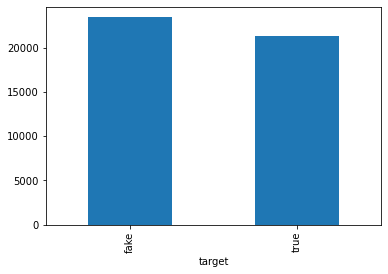

In [16]:
print(">>> The Number of fake and real articles are <<<") 
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text' ].count().plot(kind="bar") 
plt.show()

In [17]:
from nltk import tokenize

token_space= tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity): 
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space. tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})

    df_frequency = df_frequency.nlargest(columns="Frequency", n = quantity) 
    plt.figure(figsize=(12,8))
    ax = sns.barplot (data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks (rotation='vertical') 
    plt.show()

#### MOST FREQUENT WORD IN FAKE NEWS

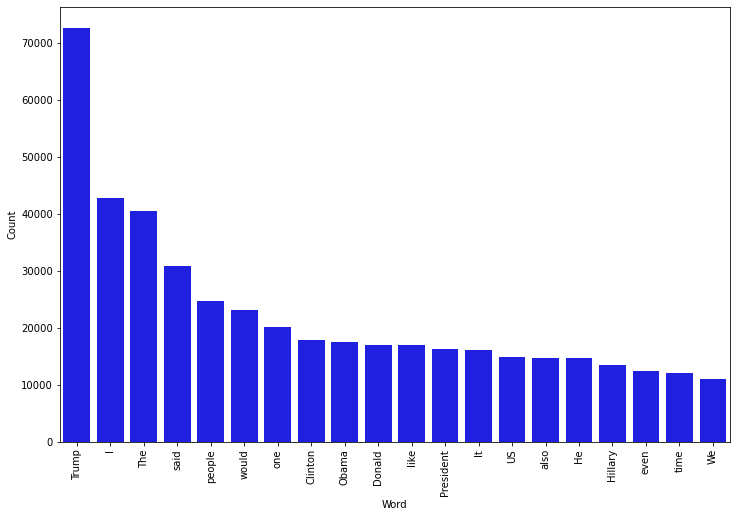

In [18]:
counter(data[data["target"] == "fake"], "text", 20)

#### MOST FREQUENT WORD IN REAL NEWS

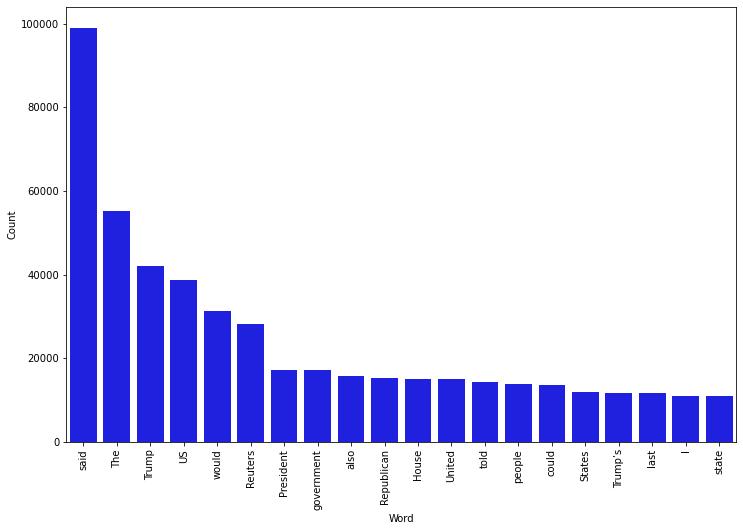

In [19]:
counter(data[data["target"] == "true"], "text", 20)

### MODELLING 

The modeling process will consist of vectorizing the corpus stored in the “text” column, then applying TF-IDF, and finally a classification machine learning algorithm. Pretty standard in text analytics and NLP.

In [21]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
     
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### PREPARING THE DATA

#### SPLIT THE DATA

In [19]:
X_train,X_test,y_train,y_test = train_test_split(data['text'],data.target, test_size=0.2 , random_state=42)

### LOGISTIC  REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test) 
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

accuracy: 98.84%


Confusion matrix, without normalization


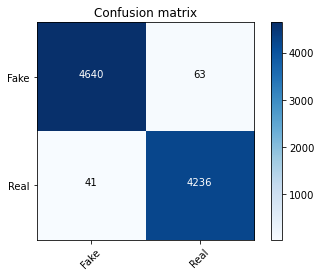

In [21]:
cm = metrics.confusion_matrix(y_test, prediction) 
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('model', DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 20,
                                        splitter='best',
                                        random_state=42))])


# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test) 
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

accuracy: 99.6%


Confusion matrix, without normalization


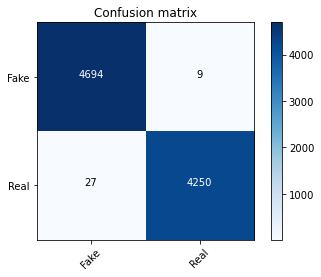

In [23]:
cm = metrics.confusion_matrix(y_test, prediction) 
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### RANDOM FOREST CLASSIFIER

In [26]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline ([('vect', CountVectorizer()), 
                ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier (n_estimators = 50, criterion="entropy"))])

model=pipe.fit(X_train, y_train) 
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,2)))

accuracy: 99.21%


Confusion matrix, without normalization


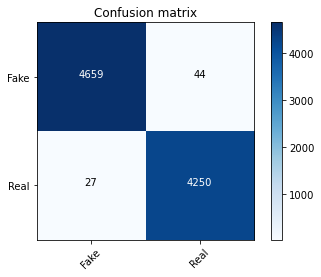

In [27]:
cm = metrics.confusion_matrix(y_test, prediction) 
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### TESTING THE MODEL

#### WITH FAKE DATA

In [29]:
x = input("ENTER THE NEWS ARTICLE HERE : ")
x=[x,]


ENTER THE NEWS ARTICLE HERE : Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(x) 
codes_list = ["FAKE", "REAL"]
nb_classifier = MultinomialNB(alpha=0.1)                                                       
nb_classifier.fit(tfidf_train,y_train) 
tfidf_test= tfidf_vectorizer.transform(x) 
pred= nb_classifier.predict(tfidf_test)
pred

array(['fake'], dtype='<U4')

In [31]:
start = "\033[1m"
end ="\033[0;0m"
print('THE GIVEN NEWS ARTICLE IS' + start + str(pred) + end)

THE GIVEN NEWS ARTICLE IS['fake']


#### WITH REAL DATA

In [35]:
x = input("ENTER THE NEWS ARTICLE HERE : ")
x=[x,]

ENTER THE NEWS ARTICLE HERE : UNITED NATIONS (Reuters) - Two North Korean shipments to a Syrian government agency responsible for the country s chemical weapons program were intercepted in the past six months, according to a confidential United Nations report on North Korea sanctions violations. The report by a panel of independent U.N. experts, which was submitted to the U.N. Security Council earlier this month and seen by Reuters on Monday, gave no details on when or where the interdictions occurred or what the shipments contained.   The panel is investigating reported prohibited chemical, ballistic missile and conventional arms cooperation between Syria and the DPRK (North Korea),  the experts wrote in the 37-page report.   Two member states interdicted shipments destined for Syria. Another Member state informed the panel that it had reasons to believe that the goods were part of a KOMID contract with Syria,  according to the report. KOMID is the Korea Mining Development Trading Cor

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(x) 
codes_list = ["FAKE", "REAL"]
nb_classifier = MultinomialNB(alpha=0.1)                                                       
nb_classifier.fit(tfidf_train,y_train) 
tfidf_test= tfidf_vectorizer.transform(x) 
pred= nb_classifier.predict(tfidf_test)
pred

array(['true'], dtype='<U4')

In [37]:
start = "\033[1m"
end ="\033[0;0m"
print('THE GIVEN NEWS ARTICLE IS' + start + str(pred) + end)

THE GIVEN NEWS ARTICLE IS['true']
